In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def ball_trajectory_points(video):
    
    cap = cv2.VideoCapture(video)

    x_list = []
    y_list = []

    success = True
    count =0
    while success:
        success, frame = cap.read()
        if success :
            gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            result = np.where(gray_image < 240)
            cord = np.array(result)
            max_cord = cord.max(1)
            min_cord = cord.min(1)
            y_list.append(max_cord[0])
            y_list.append(min_cord[0])
            x_avg = (max_cord[1]+min_cord[1])/2
            x_list.append(x_avg)
            x_list.append(x_avg)
            count +=1      
    
    return x_list, y_list


In [9]:
def least_square_method(Xin,Yin):
    
    x_array = np.asarray(Xin)
    y_array = np.asarray(Yin)
    
    X = np.reshape(x_array,(x_array.shape[0],1))
    Y = np.reshape(y_array,(y_array.shape[0],1))
    n = X.shape[0]
    
    #Compute X^2 
    X_s = np.square(X)
    
    #combinging X^2, X and 1's 
    X_Xs = np.append(  X_s, X , axis = 1)
    X_final = np.append(  X_Xs, np.ones((n,1)), axis = 1 )
    
    #computing inverse of (X^T*X)
    XTX = np.linalg.inv(X_final.transpose().dot(X_final))
    
    #computing X^T*Y
    XTY = (X_final.transpose()).dot(Y)
    
    #Computing B
    B = XTX.dot(XTY)
    
    #Computing the equation
    Y_plot = X_final.dot(B)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.gca().invert_yaxis()
    ax.plot(x_array, y_array, 'ro')
    ax.plot(x_array, Y_plot, 'k-')
    

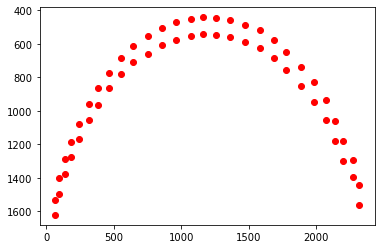

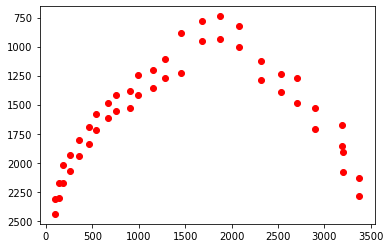

In [10]:
x1,y1 = ball_trajectory_points('ball_video1.mp4')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.plot(x1, y1, 'ro')


x2,y2 = ball_trajectory_points('ball_video2.mp4')

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax1.plot(x2, y2, 'ro')


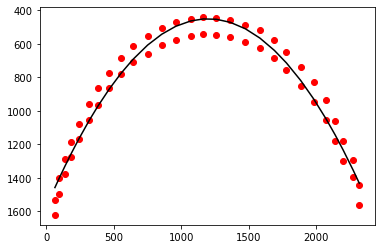

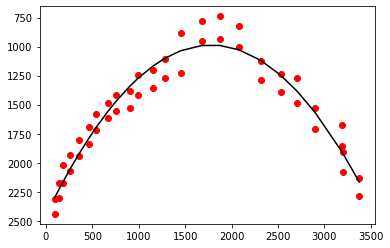

In [11]:
#Calling least square method
least_square_method(x1,y1)
least_square_method(x2,y2)